In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 1s 0us/step


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

2022-01-06 12:20:36.628515: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.fit(x_train, y_train, epochs = 5)
model.evaluate(x_test, y_test, verbose = 2)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2975 - accuracy: 0.9128
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1445 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1081 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0761 - accuracy: 0.9762
313/313 - 0s - loss: 0.0707 - accuracy: 0.9771 - 453ms/epoch - 1ms/step


[0.07065438479185104, 0.9771000146865845]

In [7]:
from tensorflow import keras

import matplotlib.pyplot as plt
print(tf.__version__)

2.7.0


In [8]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_lables), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_images.shape

(60000, 28, 28)

In [13]:
len(train_lables)

60000

In [14]:
test_images.shape

(10000, 28, 28)

In [16]:
len(test_labels)

10000

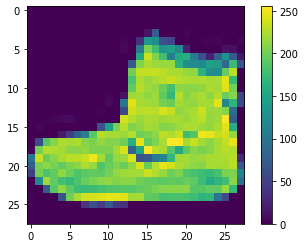

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

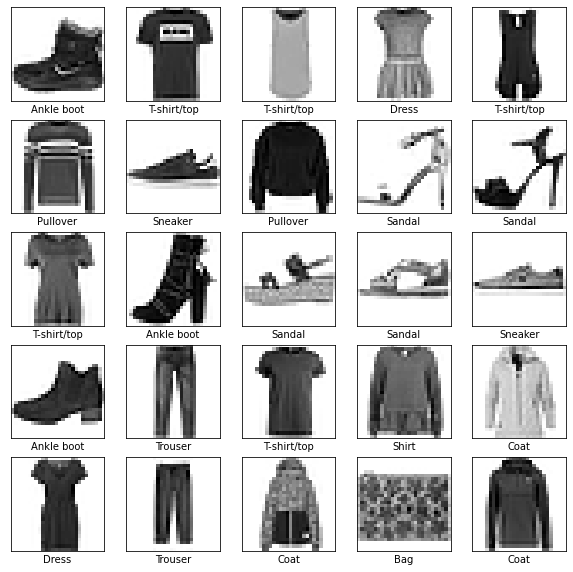

In [19]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lables[i]])
plt.show()

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.fit(train_images, train_lables, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4963 - accuracy: 0.8268
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3723 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3348 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3119 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2921 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2790 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2660 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2554 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2457 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.236

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3304 - accuracy: 0.8868 - 331ms/epoch - 1ms/step

Test accuracy: 0.8867999911308289


In [25]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [26]:
predictions = probability_model.predict(test_images)

In [27]:
predictions[0]

array([1.5025230e-07, 1.9405777e-06, 2.1748041e-09, 7.0731887e-09,
       4.4733696e-08, 6.2466122e-04, 1.5333814e-07, 7.0262328e-03,
       8.5063071e-08, 9.9234664e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])

9

In [29]:
test_labels[0]

9

In [30]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

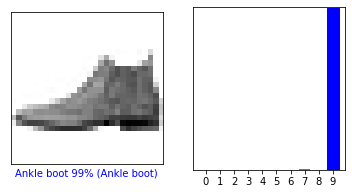

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

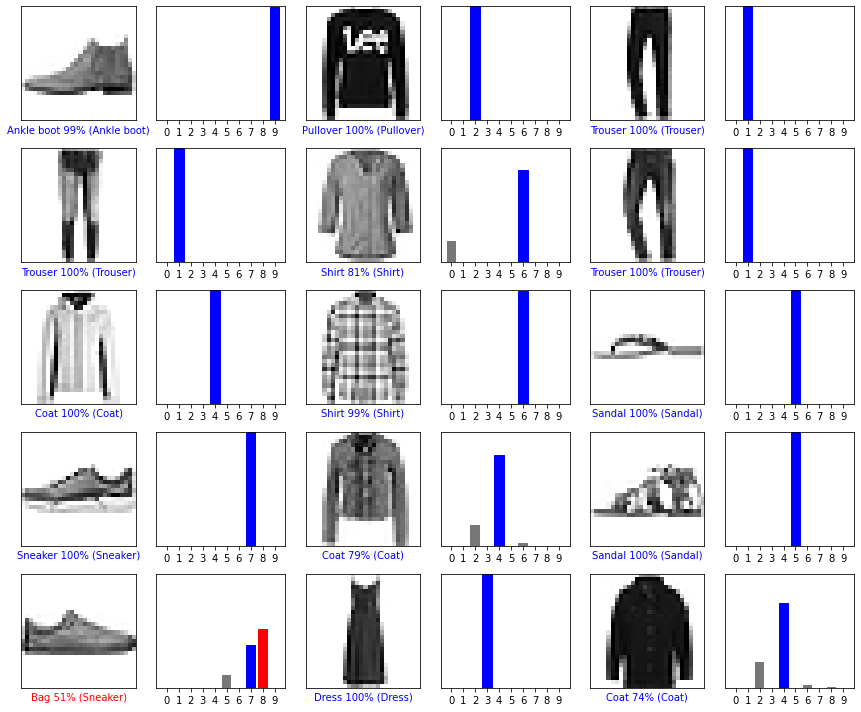

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [33]:
tf.compat.v1.disable_eager_execution()
arg = tf.constant('Hello, World!!')
sess = tf.compat.v1.Session()

print(sess.run(arg))

b'Hello, World!!'


In [34]:
x = tf.Variable(3,name='x')
y = tf.Variable(4,name='y')
f = x*x*y +y+2

In [35]:
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)

42


In [36]:
sess.close()

In [37]:
with tf.compat.v1.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

In [38]:
result

42

In [40]:
init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
    init.run()
    result = f.eval()

In [41]:
print(result)

42


# Managing Graphs

In [44]:
sess.close()

In [47]:
tf.compat.v1.reset_default_graph()

In [49]:
x1 = tf.Variable(1)
x1.graph is tf.compat.v1.get_default_graph()

True

In [50]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)
    
x2.graph is graph

True

In [51]:
x2.graph is tf.compat.v1.get_default_graph()

False

In [63]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x*3

with tf.compat.v1.Session() as sess:
    y_val, z_val = sess.run([y,z])
    print(y.eval())
    print(z.eval())

10
15


In [64]:
tf.compat.v1.reset_default_graph()

# Linear Regression with Tensorflow

In [68]:
import numpy as np
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
m,n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name='X')
y = tf.constant(housing.target.reshape(-1,1),dtype=tf.float32, name='y')
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.compat.v1.matrix_inverse(tf.matmul(XT,X)),XT),y)

with tf.compat.v1.Session() as sess:
    theta_value = theta.eval()

In [70]:
theta_value

array([[-3.6686058e+01],
       [ 4.3740416e-01],
       [ 9.4809597e-03],
       [-1.0811107e-01],
       [ 6.4812970e-01],
       [-3.8378421e-06],
       [-3.7933900e-03],
       [-4.1863596e-01],
       [-4.3155703e-01]], dtype=float32)

In [71]:
X = housing_data_plus_bias
y = housing.target.reshape(-1,1)
theta_numpy = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta_numpy)

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


In [73]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing.data, housing.target.reshape(-1,1))

print(np.r_[lin_reg.intercept_.reshape(-1,1),lin_reg.coef_.T])

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


# Implementing Gradient Descent

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m,1)), scaled_housing_data]

In [77]:
print(scaled_housing_data_plus_bias.mean(axis=0))
print(scaled_housing_data_plus_bias.mean(axis=1))
print(scaled_housing_data_plus_bias.mean())
print(scaled_housing_data_plus_bias.shape)

[ 1.00000000e+00  6.60969987e-17  5.50808322e-18  6.60969987e-17
 -1.06030602e-16 -1.10161664e-17  3.44255201e-18 -1.07958431e-15
 -8.52651283e-15]
[ 0.38915536  0.36424355  0.5116157  ... -0.06612179 -0.06360587
  0.01359031]
0.11111111111111005
(20640, 9)


## Manually Computing the Gradients

In [78]:
tf.compat.v1.reset_default_graph()

In [85]:
n_epoch = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype = tf.float32, name='X')
y = tf.constant(housing.target.reshape(-1,1), dtype = tf.float32, name='y')
theta = tf.Variable(tf.compat.v1.random_uniform([n+1,1],-1.0,1.0,seed=42),name='theta')
y_pred = tf.matmul(X, theta, name='predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name='mse')

gradients = 2/m * tf.matmul(tf.transpose(X),error)

training_op = tf.compat.v1.assign(theta, theta - learning_rate * gradients)

init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epoch):
        if epoch % 100 == 0:
            print('Epoch',epoch,'MSE =',mse.eval())
        sess.run(training_op)
    best_theta = theta.eval()

Epoch 0 MSE = 2.7544267
Epoch 100 MSE = 0.63222194
Epoch 200 MSE = 0.5727803
Epoch 300 MSE = 0.5585009
Epoch 400 MSE = 0.54907
Epoch 500 MSE = 0.542288
Epoch 600 MSE = 0.5373791
Epoch 700 MSE = 0.533822
Epoch 800 MSE = 0.53124255
Epoch 900 MSE = 0.5293705


In [86]:
best_theta

array([[ 2.06855226e+00],
       [ 7.74078071e-01],
       [ 1.31192386e-01],
       [-1.17845066e-01],
       [ 1.64778143e-01],
       [ 7.44081801e-04],
       [-3.91945131e-02],
       [-8.61356556e-01],
       [-8.23479712e-01]], dtype=float32)

In [87]:
tf.compat.v1.reset_default_graph()

In [88]:
n_epoch = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype = tf.float32, name='X')
y = tf.constant(housing.target.reshape(-1,1), dtype = tf.float32, name='y')
theta = tf.Variable(tf.compat.v1.random_uniform([n+1,1],-1.0,1.0,seed=42),name='theta')
y_pred = tf.matmul(X, theta, name='predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name='mse')

gradients = tf.gradients(mse,[theta])[0]
#gradients = 2/m * tf.matmul(tf.transpose(X),error)

training_op = tf.compat.v1.assign(theta, theta - learning_rate * gradients)

init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epoch):
        if epoch % 100 == 0:
            print('Epoch',epoch,'MSE =',mse.eval())
        sess.run(training_op)
    best_theta = theta.eval()
    
print('Best theta:')
print(best_theta)

Epoch 0 MSE = 2.7544267
Epoch 100 MSE = 0.63222194
Epoch 200 MSE = 0.5727803
Epoch 300 MSE = 0.5585009
Epoch 400 MSE = 0.54907
Epoch 500 MSE = 0.542288
Epoch 600 MSE = 0.5373791
Epoch 700 MSE = 0.533822
Epoch 800 MSE = 0.53124255
Epoch 900 MSE = 0.5293705
Best theta:
[[ 2.06855249e+00]
 [ 7.74078071e-01]
 [ 1.31192386e-01]
 [-1.17845066e-01]
 [ 1.64778143e-01]
 [ 7.44078017e-04]
 [-3.91945094e-02]
 [-8.61356676e-01]
 [-8.23479772e-01]]


In [89]:
tf.compat.v1.reset_default_graph()

In [91]:
n_epoch = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype = tf.float32, name='X')
y = tf.constant(housing.target.reshape(-1,1), dtype = tf.float32, name='y')
theta = tf.Variable(tf.compat.v1.random_uniform([n+1,1],-1.0,1.0,seed=42),name='theta')
y_pred = tf.matmul(X, theta, name='predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name='mse')

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate)
#gradients = tf.gradients(mse,[theta])[0]
#gradients = 2/m * tf.matmul(tf.transpose(X),error)

training_op = optimizer.minimize(mse)
#training_op = tf.compat.v1.assign(theta, theta - learning_rate * gradients)

init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epoch):
        if epoch % 100 == 0:
            print('Epoch',epoch,'MSE =',mse.eval())
        sess.run(training_op)
    best_theta = theta.eval()
    
print('Best theta:')
print(best_theta)

Epoch 0 MSE = 2.7544267
Epoch 100 MSE = 0.63222194
Epoch 200 MSE = 0.5727803
Epoch 300 MSE = 0.5585009
Epoch 400 MSE = 0.54907
Epoch 500 MSE = 0.542288
Epoch 600 MSE = 0.5373791
Epoch 700 MSE = 0.533822
Epoch 800 MSE = 0.53124255
Epoch 900 MSE = 0.5293705
Best theta:
[[ 2.06855249e+00]
 [ 7.74078071e-01]
 [ 1.31192386e-01]
 [-1.17845066e-01]
 [ 1.64778143e-01]
 [ 7.44078017e-04]
 [-3.91945094e-02]
 [-8.61356676e-01]
 [-8.23479772e-01]]


In [92]:
tf.compat.v1.reset_default_graph()

n_epoch = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype = tf.float32, name='X')
y = tf.constant(housing.target.reshape(-1,1), dtype = tf.float32, name='y')
theta = tf.Variable(tf.compat.v1.random_uniform([n+1,1],-1.0,1.0,seed=42),name='theta')
y_pred = tf.matmul(X, theta, name='predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name='mse')

optimizer = tf.compat.v1.train.MomentumOptimizer(learning_rate=learning_rate,momentum=0.9)
#optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate)
#gradients = tf.gradients(mse,[theta])[0]
#gradients = 2/m * tf.matmul(tf.transpose(X),error)

training_op = optimizer.minimize(mse)
#training_op = tf.compat.v1.assign(theta, theta - learning_rate * gradients)

init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epoch):
        if epoch % 100 == 0:
            print('Epoch',epoch,'MSE =',mse.eval())
        sess.run(training_op)
    best_theta = theta.eval()
    
print('Best theta:')
print(best_theta)

Epoch 0 MSE = 2.7544267
Epoch 100 MSE = 0.5273161
Epoch 200 MSE = 0.5244148
Epoch 300 MSE = 0.5243282
Epoch 400 MSE = 0.5243219
Epoch 500 MSE = 0.5243211
Epoch 600 MSE = 0.52432096
Epoch 700 MSE = 0.524321
Epoch 800 MSE = 0.524321
Epoch 900 MSE = 0.524321
Best theta:
[[ 2.068558  ]
 [ 0.8296167 ]
 [ 0.11875112]
 [-0.26552212]
 [ 0.30569226]
 [-0.00450316]
 [-0.03932616]
 [-0.8998917 ]
 [-0.87054664]]


# Feeding Data to the Training Algorithm

In [93]:
tf.compat.v1.reset_default_graph()

In [95]:
A = tf.compat.v1.placeholder(tf.float32,shape=(None,3))
B = A + 5
with tf.compat.v1.Session() as sess:
    B_val_1 = B.eval(feed_dict = {A:[[1,2,3]]})
    B_val_2 = B.eval(feed_dict = {A:[[4,5,6],[7,8,9]]})
    
print(B_val_1)
print(B_val_2)

[[6. 7. 8.]]
[[ 9. 10. 11.]
 [12. 13. 14.]]


In [96]:
n_epochs = 1000
learning_rate = 0.1
tf.compat.v1.reset_default_graph()

In [98]:
X = tf.compat.v1.placeholder(tf.float32, shape=(None, n+1),name ='X')
y = tf.compat.v1.placeholder(tf.float32, shape=(None,1),name='y')
theta = tf.Variable(tf.compat.v1.random_uniform([n+1,1],-1.0,1.0,seed=42),name='theta')
y_pred = tf.matmul(X,theta,name='predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name='mse')
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.compat.v1.global_variables_initializer()

saver = tf.compat.v1.train.Saver()

with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print('Epoch',epoch,'MSE=',mse.eval())
            save_path = saver.save(sess, '/tmp/my_model.ckpt')
        sess.run(training_op)
        
    best_theta = theta.eval()
    save_path = saver.save(sess,'/tmp/my_model_final.ckpt')

InvalidArgumentError: You must feed a value for placeholder tensor 'y_1' with dtype float and shape [?,1]
	 [[node y_1
 (defined at /var/folders/4j/ry7_scw962q90x2629f31m2m0000gn/T/ipykernel_81041/974076525.py:2)
]]

Errors may have originated from an input operation.

Operation defined at: (most recent call last)
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2914, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "/var/folders/4j/ry7_scw962q90x2629f31m2m0000gn/T/ipykernel_81041/974076525.py", line 2, in <module>
>>>     y = tf.compat.v1.placeholder(tf.float32, shape=(None,1),name='y')
>>> 

Original stack trace for 'y_1':
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 677, in start
    self.io_loop.start()
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
    self._run_once()
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
    handle._run()
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
    await self.process_one()
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 446, in process_one
    await dispatch(*args)
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
    await result
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 648, in execute_request
    reply_content = await reply_content
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 353, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2914, in run_cell
    result = self._run_cell(
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell
    return runner(coro)
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/4j/ry7_scw962q90x2629f31m2m0000gn/T/ipykernel_81041/974076525.py", line 2, in <module>
    y = tf.compat.v1.placeholder(tf.float32, shape=(None,1),name='y')
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py", line 3289, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/gen_array_ops.py", line 6893, in placeholder
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py", line 744, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 3697, in _create_op_internal
    ret = Operation(
  File "/Users/zhouyi/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 2101, in __init__
    self._traceback = tf_stack.extract_stack_for_node(self._c_op)


# Visualizing the Graph and Training Curves Using TensorBoard

In [99]:
from tensorflow_graph_in_jupyter import show_graph

ModuleNotFoundError: No module named 'tensorflow_graph_in_jupyter'